In [33]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [34]:
using StaticArrays

In [35]:
using SciPy
using Statistics

In [36]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [37]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= -0.17; k2 = -0.17;
k = 0.5

condition1 = SA[0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
condition2 = SA[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.5

In [38]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]

ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )

ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );

In [39]:
ds_HR1

6-dimensional continuous dynamical system
 state:       [0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.5]

In [40]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.5]

In [41]:
data1 = trajectory(ds_HR1, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-dimensional Dataset{Float64} with 30000001 points
  0.02        0.01       0.01        0.01        0.01       0.01
  0.0569024   0.0197714  0.0108182   0.0469491   0.0198046  0.0108132
  0.0940182   0.0292358  0.0116548   0.084096    0.0293383  0.0116448
  0.131439    0.038257   0.0125099   0.121532    0.0384648  0.012495
  0.16925     0.0466961  0.0133838   0.159343    0.0470452  0.0133639
  0.207532    0.05441    0.0142766   0.197608    0.0549366  0.0142518
  0.246358    0.0612505  0.0151885   0.236404    0.0619914  0.0151588
  0.285803    0.0670631  0.01612     0.275803    0.0680557  0.0160852
  0.325936    0.0716856  0.0170712   0.315876    0.0729685  0.0170315
  0.366827    0.0749475  0.0180426   0.356693    0.0765606  0.0179978
  0.408542    0.0766687  0.0190346   0.398322    0.078653   0.0189847
  0.451147    0.0766579  0.0200475   0.440828    0.0790565  0.0199925
  0.494707    0.0747124  0.0210819   0.484278    0.0775698  0.0210217
  ⋮                                         

In [42]:
data2 = trajectory(ds_HR2, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-dimensional Dataset{Float64} with 30000001 points
  0.01        0.01       0.01        0.01        0.01       0.01
  0.0469168   0.0198047  0.0108132   0.0469168   0.0198047  0.0108132
  0.0840261   0.0293387  0.0116448   0.0840261   0.0293387  0.0116448
  0.121421    0.0384662  0.0124949   0.121421    0.0384662  0.0124949
  0.159187    0.0470484  0.0133638   0.159187    0.0470484  0.0133638
  0.197404    0.054943   0.0142515   0.197404    0.054943   0.0142515
  0.23615     0.0620026  0.0151584   0.23615     0.0620026  0.0151584
  0.275497    0.068074   0.0160847   0.275497    0.068074   0.0160847
  0.315516    0.0729965  0.0170308   0.315516    0.0729965  0.0170308
  0.356276    0.0766012  0.017997    0.356276    0.0766012  0.017997
  0.397846    0.07871    0.0189836   0.397846    0.07871    0.0189836
  0.440291    0.0791341  0.0199912   0.440291    0.0791341  0.0199912
  0.483677    0.0776728  0.0210201   0.483677    0.0776728  0.0210201
  ⋮                                         

In [43]:
x_sum1 = data1[15000:end, 1] + data1[15000:end, 4]
x_sum2 = data2[15000:end, 1] + data2[15000:end, 4]

index1 = signal.argrelmax( x_sum1 )[1]
spikes1 = [x_sum1[x] for x in index1]

index2 = signal.argrelmax( x_sum2 )[1]
spikes2 = [x_sum2[x] for x in index2]

Hs1 = Statistics.mean(spikes1) + 6 * Statistics.std(spikes1)
Hs2 = Statistics.mean(spikes2) + 6 * Statistics.std(spikes2)

4.958419042931963

In [44]:
 lyapunovspectrum(ds_HR1, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-element Vector{Float64}:
   5.48648964433379e-5
  -0.017636530216640064
  -0.017670680733880444
  -0.035685691599686785
  -8.71610143617318
 -10.745556735780408

In [45]:
 lyapunovspectrum(ds_HR2, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-element Vector{Float64}:
  0.011655959996471999
  3.852204757008685e-5
 -0.0043701662766668535
 -0.007338362621217877
 -8.827111521958097
 -9.693248244801936

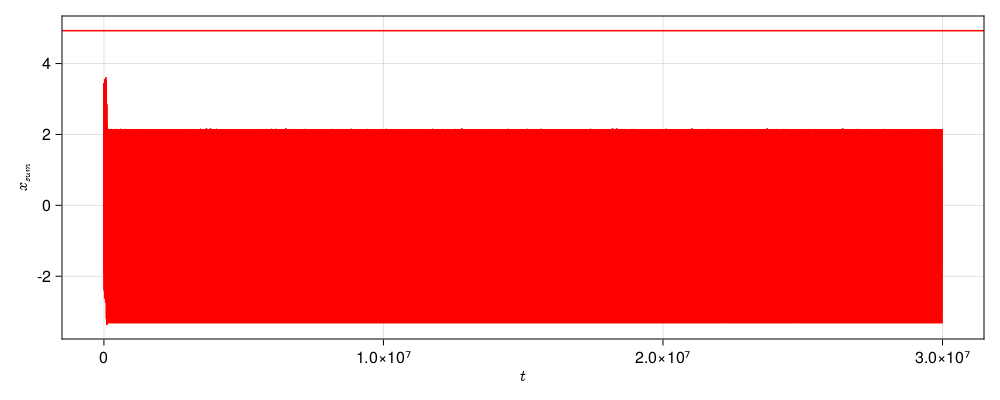

In [46]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!((data1[15000:end, 1] + data1[15000:end, 4]), lw = 0.5, color = "red")
lines!((data1[15000:end, 1] + data1[15000:end, 4]), lw = 0.5, color = "red")
hlines!(Hs1, lw = 2, color = "red")
fig

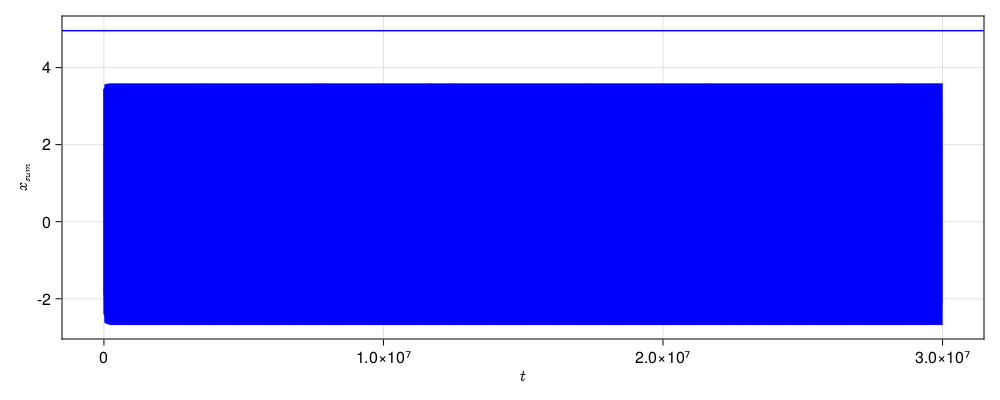

In [47]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!((data2[15000:end, 1] + data2[15000:end, 4]), lw = 0.5, color = "blue")
hlines!(Hs2, lw = 2, color = "blue")
fig

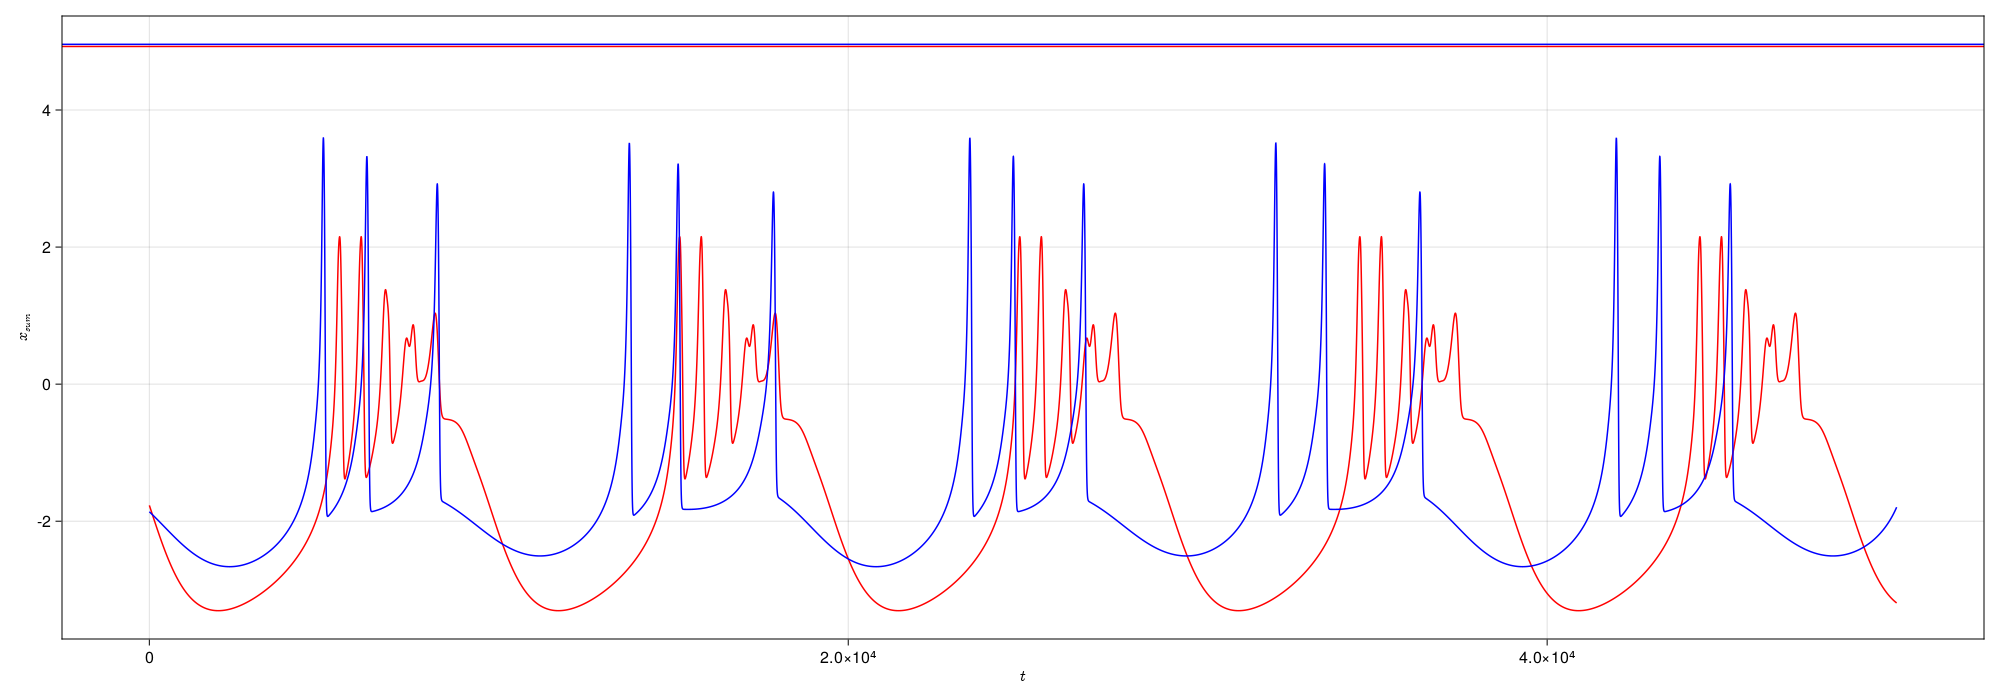

In [48]:
fig = Figure(resolution = (2000, 700))
ax = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")

lines!((data1[650000:700000, 1] + data1[650000:700000, 4]), lw = 0.4, color = "red")

lines!((data2[650000:700000, 1] + data2[650000:700000, 4]), lw = 0.4, color = "blue")

hlines!(Hs1, lw = 2, color = "red")
hlines!(Hs2, lw = 2, color = "blue")
fig

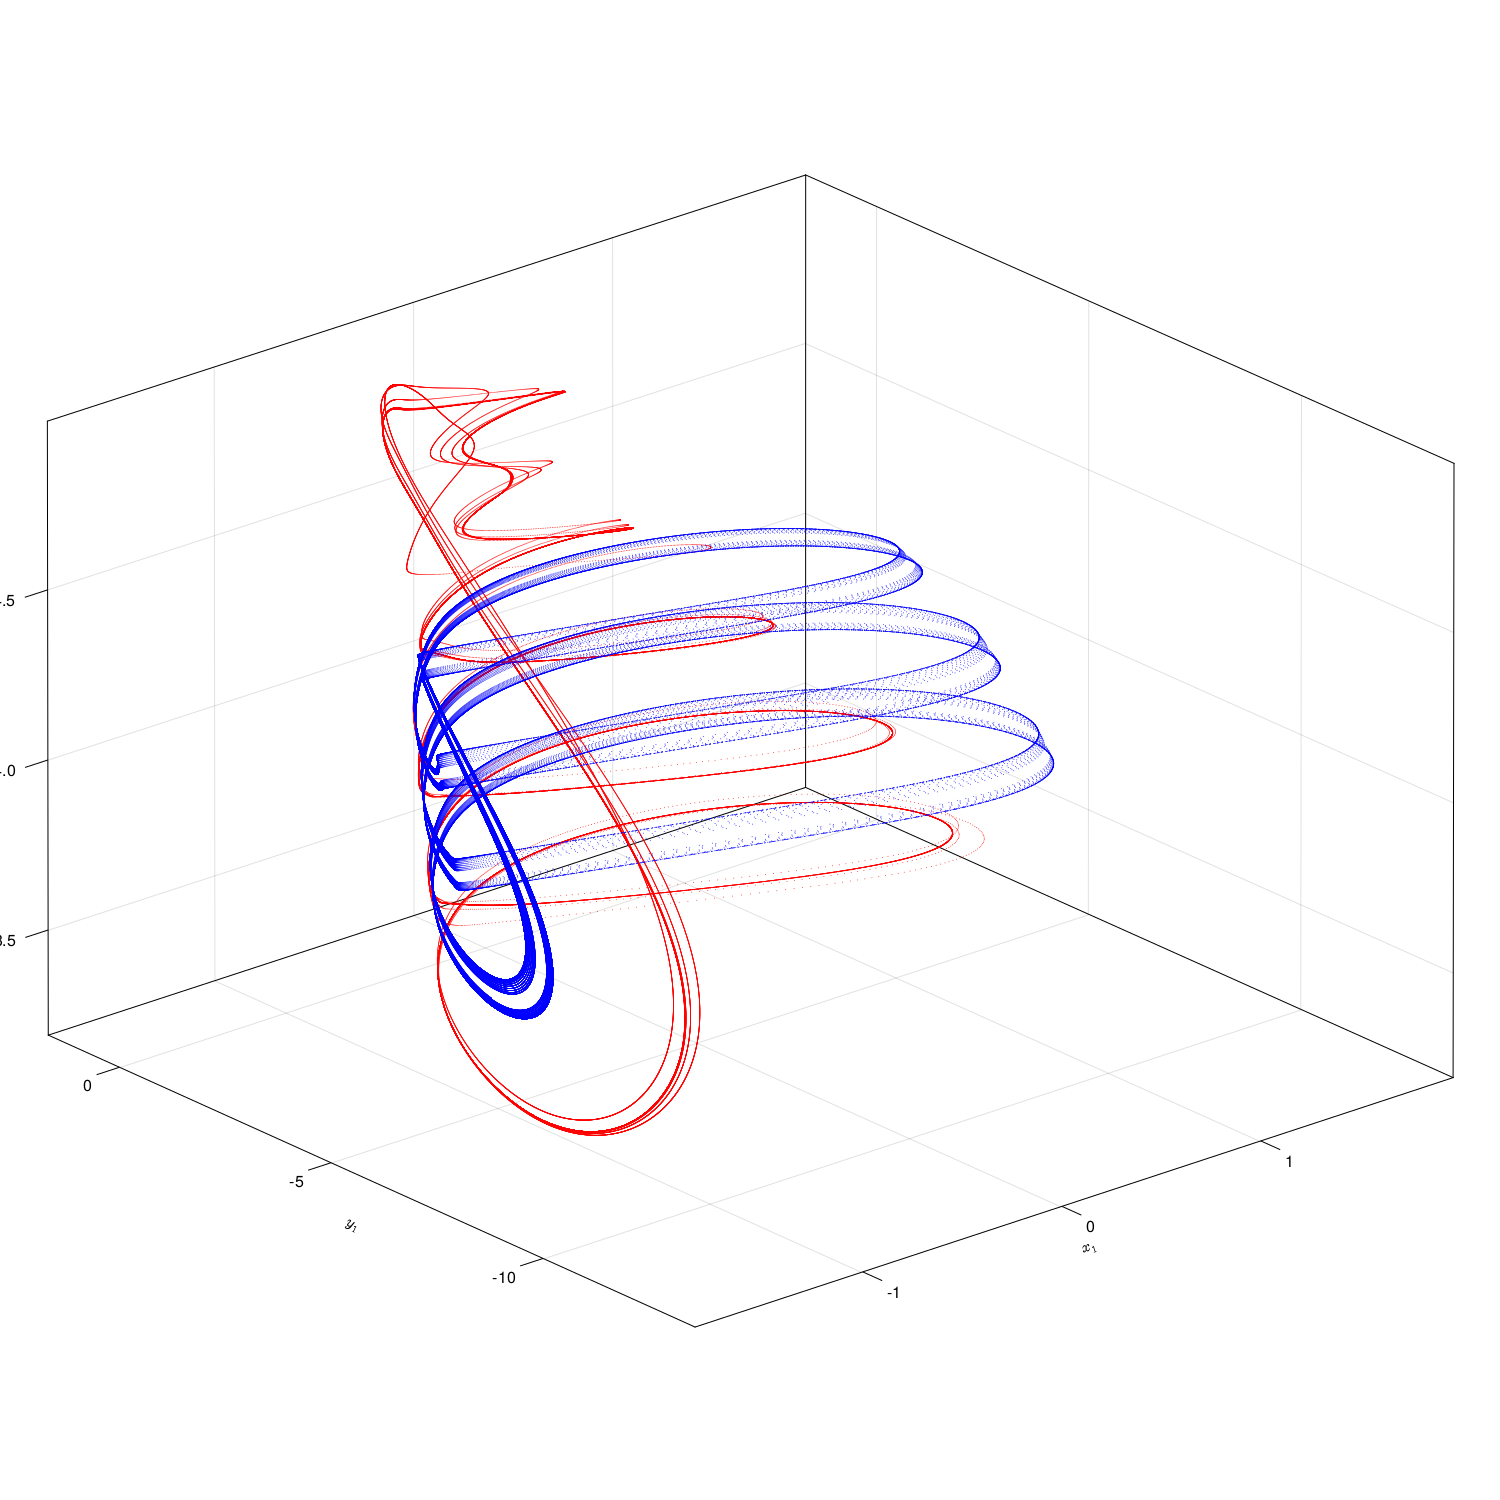

In [49]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

scatter!(ax, data1[100000:550000, 1], data1[100000:550000, 2], data1[100000:550000, 3], markersize = 0.9, color = "red")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 2], data2[100000:550000, 3], markersize = 0.9, color = "blue")

fig

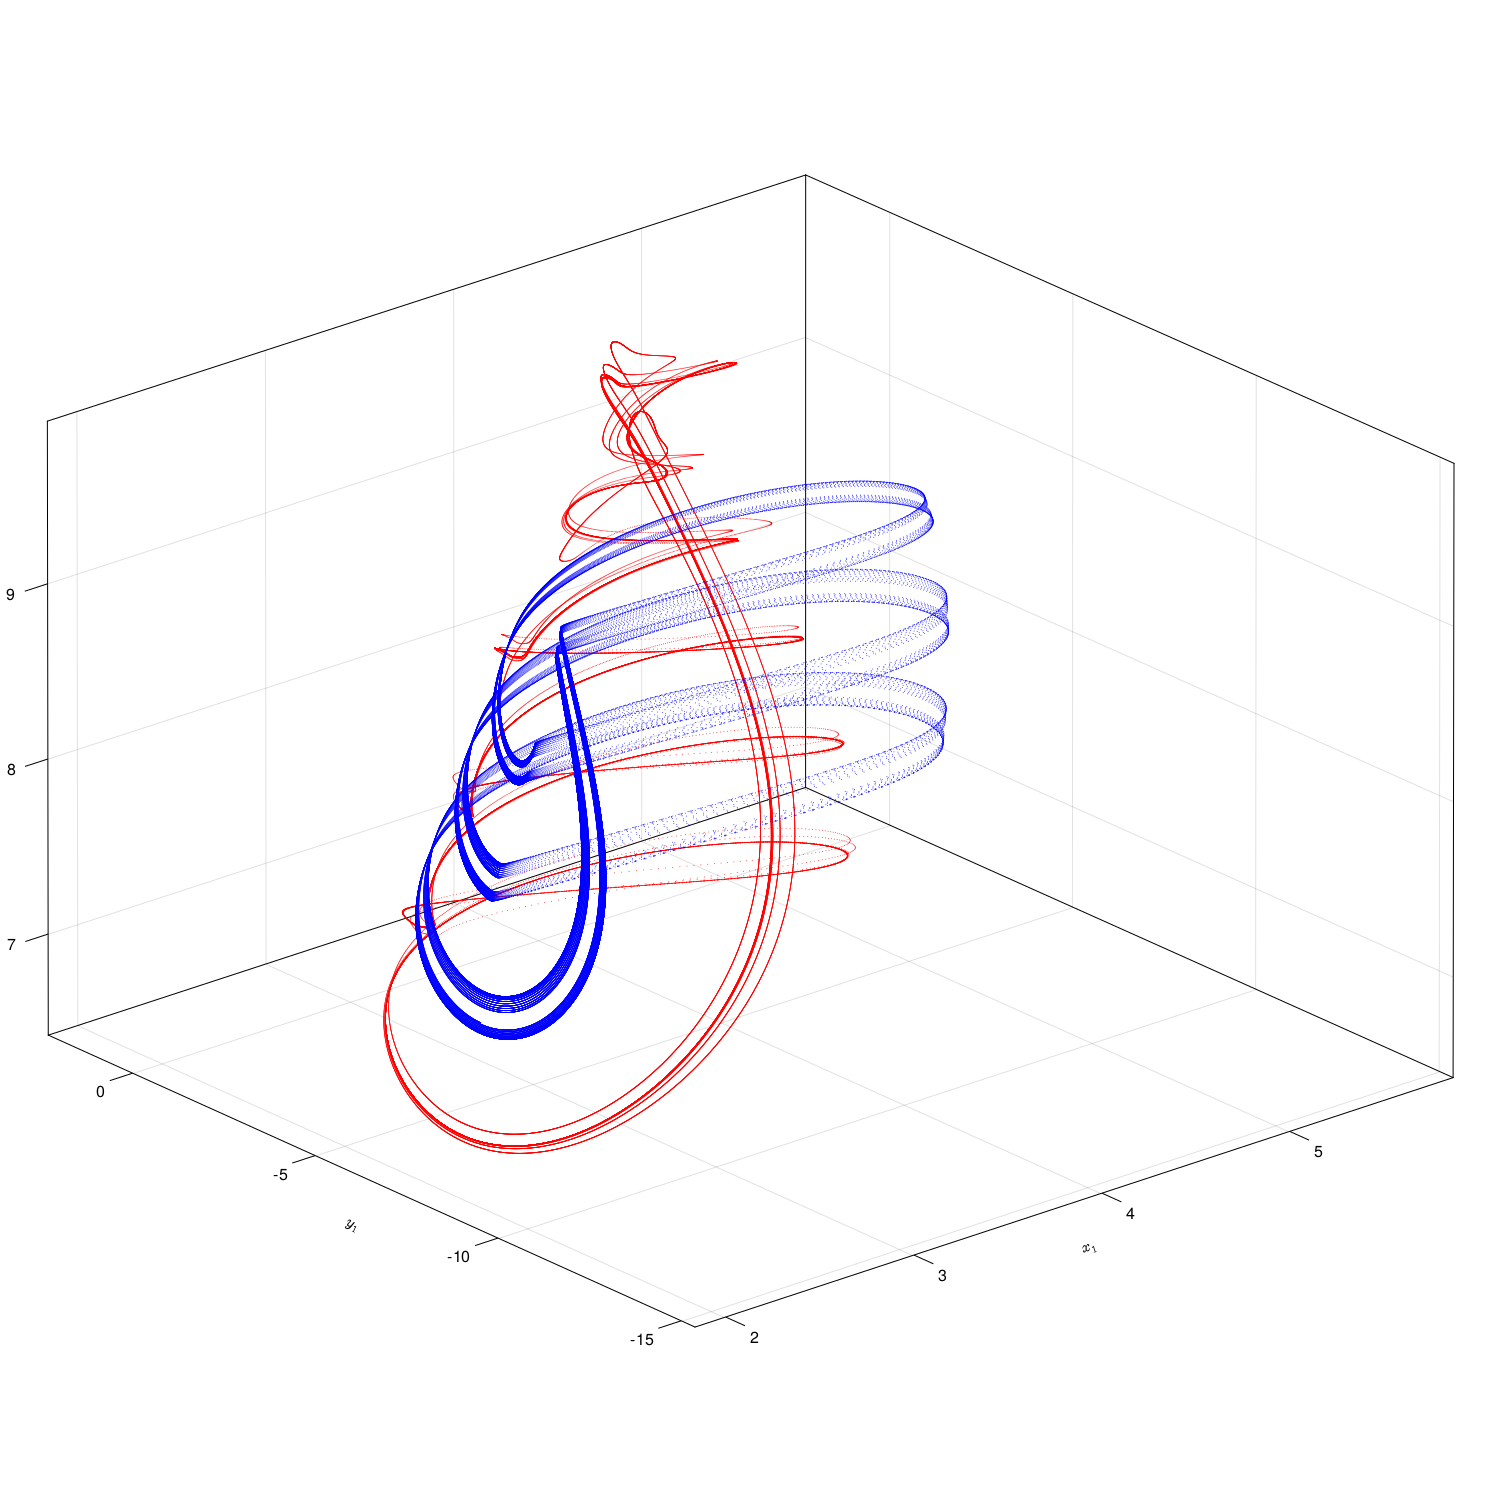

In [50]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

scatter!(ax, data1[100000:350000, 1] + data1[100000:350000, 3],
             data1[100000:350000, 2] + data1[100000:350000, 4],
             data1[100000:350000, 3] + data1[100000:350000, 6], markersize = 0.9, color = "red")

scatter!(ax, data2[100000:350000, 1] + data2[100000:350000, 3],
             data2[100000:350000, 2] + data2[100000:350000, 4],
             data2[100000:350000, 3] + data2[100000:350000, 6], markersize = 0.9, color = "blue")

fig

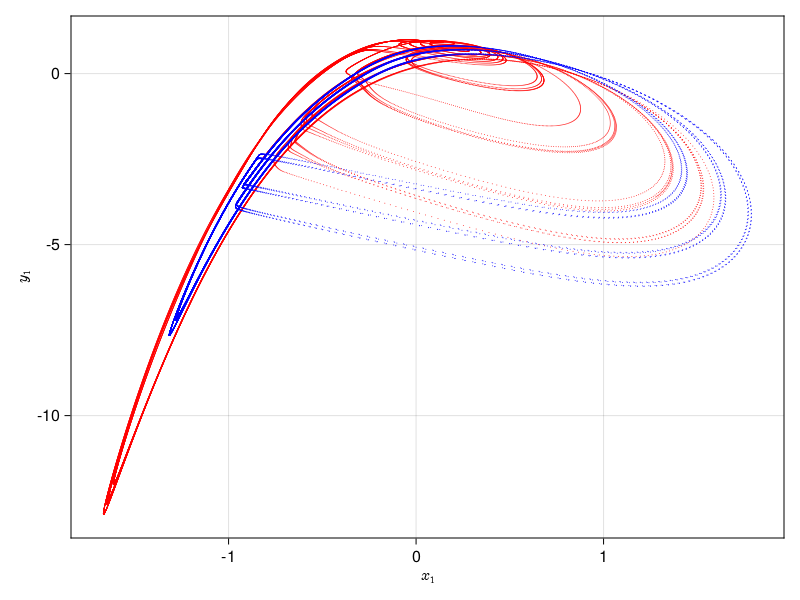

In [51]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1")

scatter!(ax, data1[100000:150000, 1], data1[100000:150000, 2], markersize = 0.9, color = "red")
scatter!(ax, data2[100000:150000, 1], data2[100000:150000, 2], markersize = 0.9, color = "blue")
fig

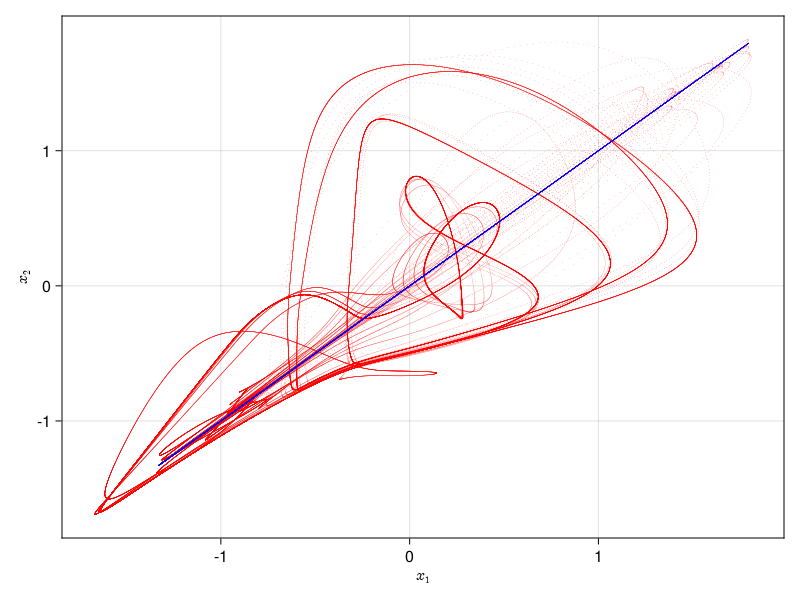

In [52]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")

scatter!(ax, data1[15000:500000, 1], data1[15000:500000, 4], markersize = 0.5, color = "red")
scatter!(ax, data2[15000:500000, 1], data2[15000:500000, 4], markersize = 0.5, color = "blue")

fig

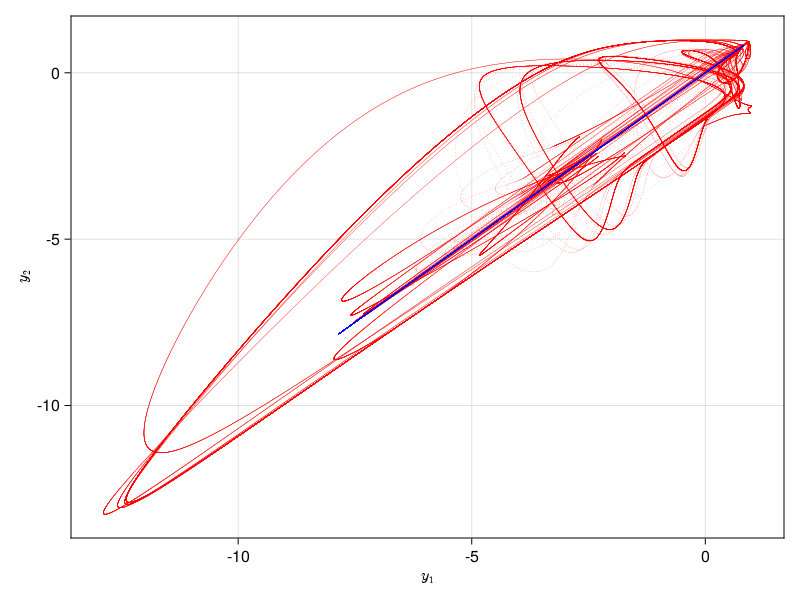

In [53]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"y_2")

scatter!(ax, data1[15000:500000, 2], data1[15000:500000, 5], markersize = 0.5, color = "red")
scatter!(ax, data2[15000:500000, 2], data2[15000:500000, 5], markersize = 0.5, color = "blue")
fig

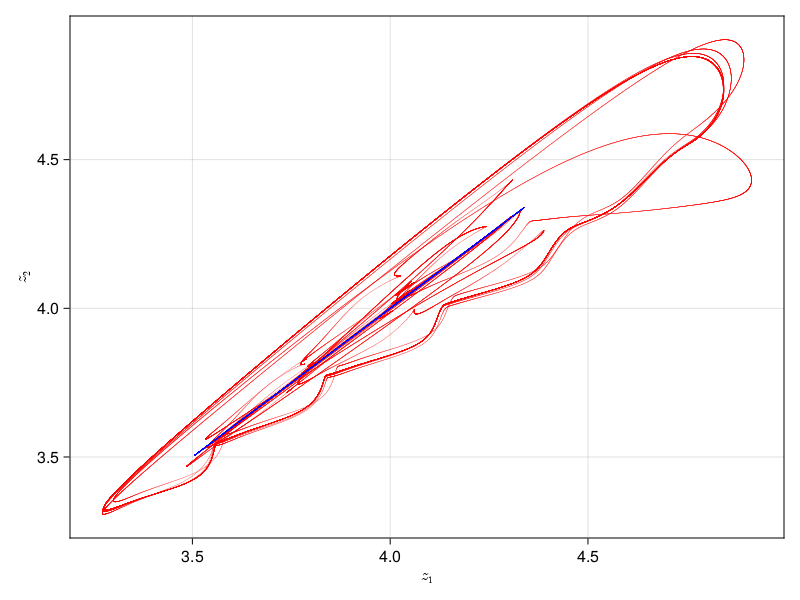

In [54]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"z_1", ylabel = L"z_2")

scatter!(ax, data1[15000:500000, 3], data1[15000:500000, 6], markersize = 0.5, color = "red")
scatter!(ax, data2[15000:500000, 3], data2[15000:500000, 6], markersize = 0.5, color = "blue")
fig

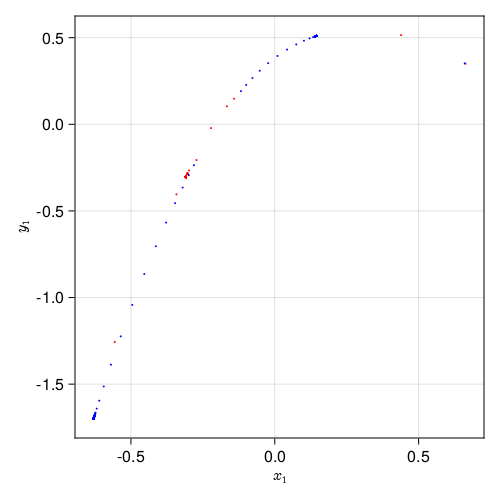

In [55]:
plane = (3, 3.6)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 1], psos[:, 2]; markersize = 2.0, color = COLORS[i])
end
fig

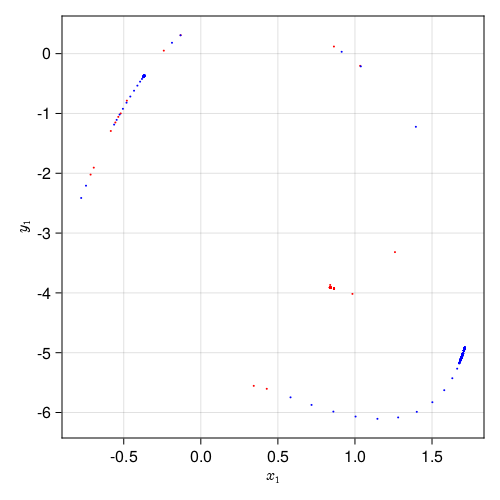

In [56]:
plane = (3, 3.8)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 1], psos[:, 2]; markersize = 2.0, color = COLORS[i])
end
fig

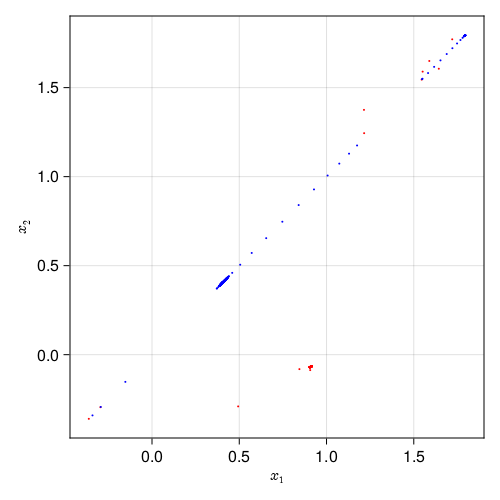

In [57]:
plane = (3, 3.7)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 1], psos[:, 4]; markersize = 2.0, color = COLORS[i])
end
fig

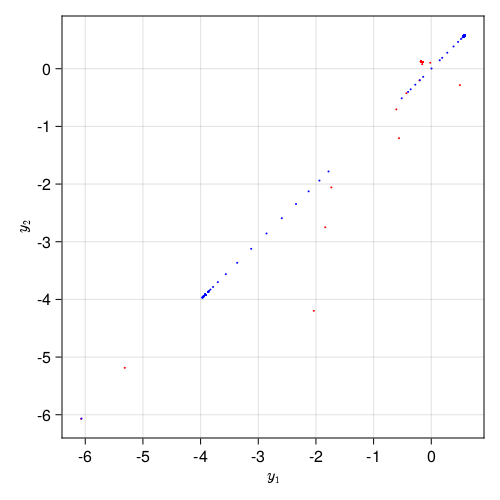

In [58]:
plane = (3, 3.7)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"y_2")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 2], psos[:, 5]; markersize = 2.0, color = COLORS[i])
end
fig

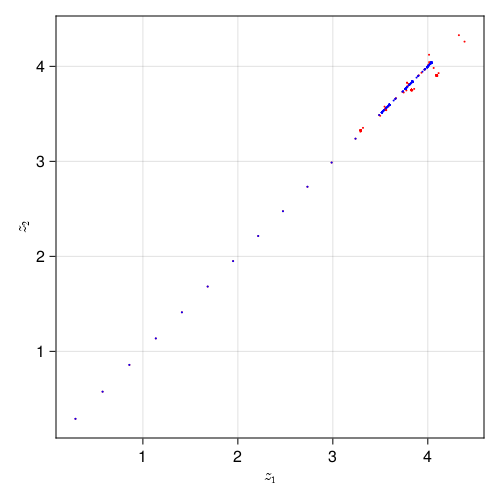

In [59]:
plane = (2, -2.0)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"z_1", ylabel = L"z_2")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 3], psos[:, 6]; markersize = 2.0, color = COLORS[i])
end
fig

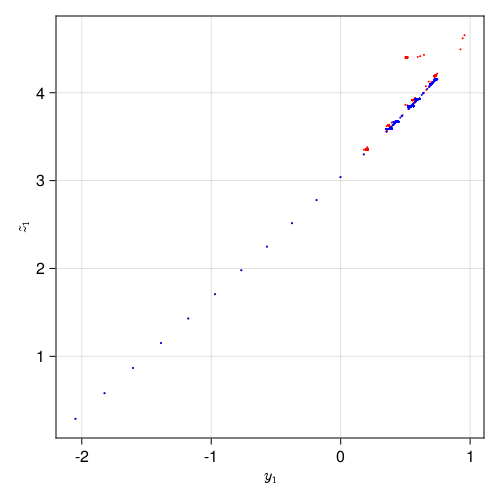

In [60]:
plane = (1, 0.0)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 2], psos[:, 3]; markersize = 2.0, color = COLORS[i])
end
fig

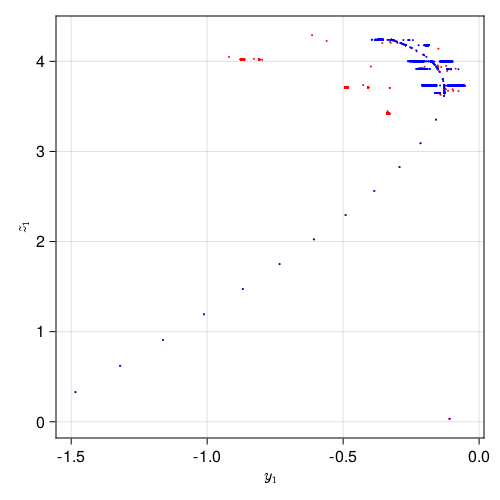

In [61]:
plane = (1, 1.0)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 2], psos[:, 3]; markersize = 2.0, color = COLORS[i])
end
fig

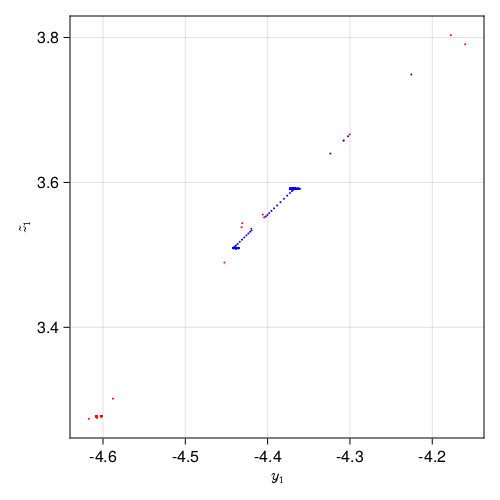

In [62]:
plane = (1, -1.0)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01] ]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 2], psos[:, 3]; markersize = 2.0, color = COLORS[i])
end
fig

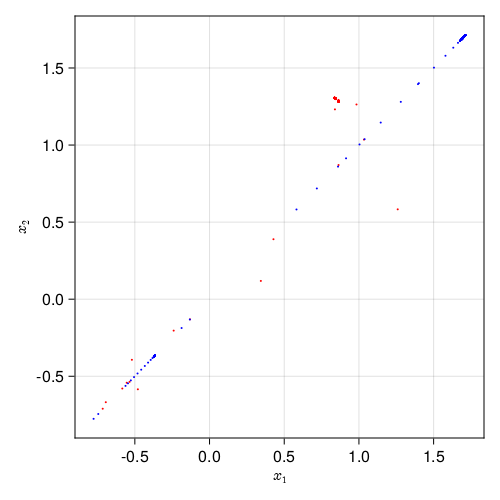

In [63]:
plane = (3, 3.8)
u0s = [ [0.02, 0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
COLORS = [
    "red",
    "blue"
]

fig = Figure(resolution = (500,500))
ax1 = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")

for (i, u0) in enumerate(u0s)
    psos = poincaresos(ds_HR1, plane, 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000) )
    scatter!(ax1, psos[:, 1], psos[:, 4]; markersize = 2.0, color = COLORS[i])
end
fig